In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # SMOTE

# AI algorithms
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.naive_bayes import GaussianNB #naive bayes
from sklearn.ensemble import RandomForestRegressor # random forest
from sklearn.svm import SVC # SVC
from sklearn.neural_network import MLPClassifier #Neural Network

In [2]:
# import dataset and show first 10 row 
df = pd.read_csv('winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Data Investigation

In [3]:
# show details of dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# show if we have data missing
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**Observations :** The data has 0 missing values and data consists 11 featrues

Text(0.5, 1.0, 'heatmap')

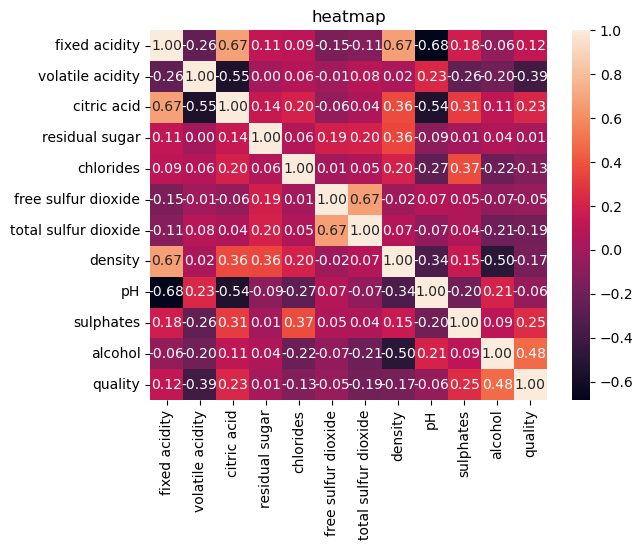

In [5]:
heatmap = sns.heatmap(df.corr(),annot=True,fmt='.2f')
heatmap.set_title("heatmap")

In [6]:
# corrolation of the residual sugar is so low it has no point of been in the feature
df = df.drop('residual sugar',axis=1)
df.head(10)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Observations :** The data contains 11 features while only ***volatile acidity*** ***citric acid*** ***sulphates*** and ***alcohol*** shows strong corrlation, this suggest we might only need these features

## Data cleaning

In [7]:
# outlier detecte and remove

# Inter Quartile Range approach to finding the outliers

for feature in df.columns[:10]:
    q1 = np.percentile(df[feature],25,interpolation ='midpoint')
    q3 = np.percentile(df[feature],75,interpolation ='midpoint')
    iqr = q3 - q1
    # upper bound
    upper = q3 + 1.2 * iqr
    
    # lower bound 
    lower = q1 - 1.2 * iqr
    print(feature)
    print("q1",q1)
    print("q3",q3)
    print("iqr",iqr)
    print("upper" , upper)
    print("lower" , lower)
    # remove the outliers from the dataframe
    df_without_outlier = df[(df[feature] >lower ) & (df[feature] < upper)]

df_without_outlier.describe()

fixed acidity
q1 7.1
q3 9.2
iqr 2.0999999999999996
upper 11.719999999999999
lower 4.58
volatile acidity
q1 0.39
q3 0.64
iqr 0.25
upper 0.94
lower 0.09000000000000002
citric acid
q1 0.09
q3 0.42
iqr 0.32999999999999996
upper 0.816
lower -0.30599999999999994
chlorides
q1 0.07
q3 0.09
iqr 0.01999999999999999
upper 0.11399999999999999
lower 0.04600000000000002
free sulfur dioxide
q1 7.0
q3 21.0
iqr 14.0
upper 37.8
lower -9.8
total sulfur dioxide
q1 22.0
q3 62.0
iqr 40.0
upper 110.0
lower -26.0
density
q1 0.9956
q3 0.997835
iqr 0.002234999999999987
upper 1.000517
lower 0.9929180000000001
pH
q1 3.21
q3 3.4
iqr 0.18999999999999995
upper 3.6279999999999997
lower 2.982
sulphates
q1 0.55
q3 0.73
iqr 0.17999999999999994
upper 0.946
lower 0.33400000000000013
alcohol
q1 9.5
q3 11.1
iqr 1.5999999999999996
upper 13.02
lower 7.58


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,8.333376,0.529213,0.270609,0.087787,15.885787,46.457487,0.996795,3.309315,0.656815,10.375941,5.623096
std,1.715865,0.179711,0.193974,0.047250,10.488556,32.969506,0.001832,0.152078,0.169757,0.997928,0.797663
min,4.700000,0.120000,0.000000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,0.070750,7.000000,22.000000,0.995640,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,0.079000,14.000000,38.000000,0.996770,3.310000,0.620000,10.100000,6.000000
75%,9.200000,0.640000,0.420000,0.090000,21.000000,62.000000,0.997860,3.400000,0.730000,11.000000,6.000000
max,15.600000,1.580000,1.000000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,13.000000,8.000000


In [8]:
df_without_outlier['quality'].value_counts()

5    680
6    628
7    192
4     52
8     14
3     10
Name: quality, dtype: int64

**observation :** 23 outliers are removed


In [9]:
# data standarlization
df_standardized = pd.DataFrame()
for feature in df_without_outlier.columns[:10]:
    df_standardized[feature] = (df_without_outlier[feature] - df_without_outlier[feature].mean()) / df_without_outlier[feature].std()
df_standardized['quality'] = df['quality']
df_standardized.head(10)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.543968,0.950339,-1.395079,-0.249457,-0.465821,-0.377849,0.548681,1.319622,-0.570315,-0.977968,5
1,-0.310849,1.951946,-1.395079,0.216153,0.868967,0.623076,0.002871,-0.718808,0.136580,-0.577137,5
2,-0.310849,1.284208,-1.188866,0.089169,-0.084453,0.228772,0.112033,-0.324273,-0.040144,-0.577137,5
3,1.670658,-1.386741,1.491905,-0.270621,0.106231,0.410759,0.657843,-0.981831,-0.452499,-0.577137,6
4,-0.543968,0.950339,-1.395079,-0.249457,-0.465821,-0.377849,0.548681,1.319622,-0.570315,-0.977968,5
5,-0.543968,0.727760,-1.395079,-0.270621,-0.275137,-0.195862,0.548681,1.319622,-0.570315,-0.977968,5
6,-0.252570,0.393892,-1.085760,-0.397606,-0.084453,0.380428,-0.215453,-0.061250,-1.159394,-0.977968,5
7,-0.602248,0.672116,-1.395079,-0.482262,-0.084453,-0.772153,-1.197911,0.530553,-1.100486,-0.376722,7
8,-0.310849,0.282602,-1.291973,-0.312950,-0.656505,-0.863146,0.002871,0.333285,-0.511407,-0.877760,7
9,-0.485688,-0.162556,0.460839,-0.355278,0.106231,1.684663,0.548681,0.267529,0.843474,0.124316,5


In [10]:
df_standardized.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1576.000000
mean,-1.714675e-14,-1.829896e-15,5.493491e-15,7.119904e-15,-3.036030e-16,1.158831e-17,4.957129e-13,-1.279321e-14,-4.542103e-15,2.579972e-14,5.623096
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.797663
min,-2.117518e+00,-2.277058e+00,-1.395079e+00,-1.603960e+00,-1.419241e+00,-1.227118e+00,-3.670429e+00,-3.743575e+00,-1.925197e+00,-1.980044e+00,3.000000
25%,-7.188068e-01,-7.746488e-01,-9.310997e-01,-3.605688e-01,-8.471888e-01,-7.418215e-01,-6.302683e-01,-6.530521e-01,-6.292231e-01,-8.777601e-01,5.000000
50%,-2.525697e-01,-5.126664e-02,-5.469360e-02,-1.859648e-01,-1.797947e-01,-2.565245e-01,-1.350325e-02,4.506109e-03,-2.168678e-01,-2.765142e-01,6.000000
75%,5.050655e-01,6.164708e-01,7.701592e-01,4.684037e-02,4.875994e-01,4.714208e-01,5.814294e-01,5.963085e-01,4.311191e-01,6.253547e-01,6.000000
max,4.234962e+00,5.847080e+00,3.760251e+00,1.107334e+01,5.350042e+00,7.356571e+00,3.763501e+00,4.607413e+00,7.912422e+00,2.629508e+00,8.000000


<AxesSubplot:title={'center':'distribution of dataset'}, xlabel='quality'>

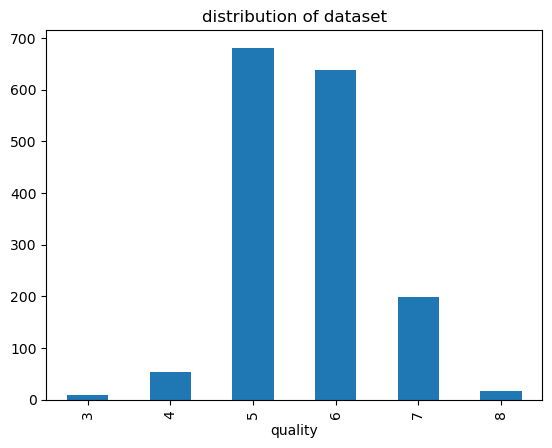

In [11]:
df.pivot_table(index='quality', aggfunc='size').plot(kind='bar', title='distribution of dataset')

**observation :** data is imbalanced, apply SMOTE to bring data to balance


<AxesSubplot:title={'center':'show distripution in train dataset'}, xlabel='quality'>

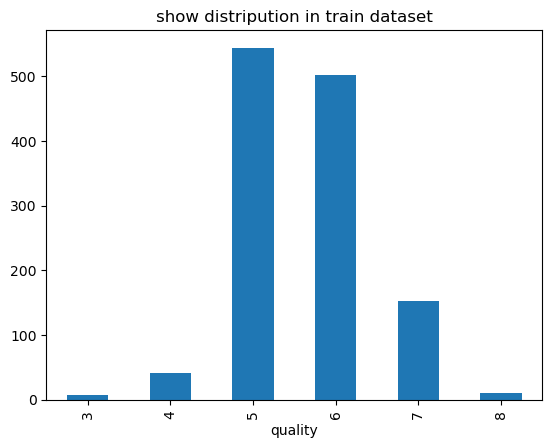

In [12]:
train, test = train_test_split(df_standardized, test_size = 0.2, stratify=df_standardized.quality)
# varify distribution stayed same
train.pivot_table(index='quality', aggfunc='size').plot(kind='bar', title='show distripution in train dataset')


<AxesSubplot:title={'center':'show distripution in test dataset'}, xlabel='quality'>

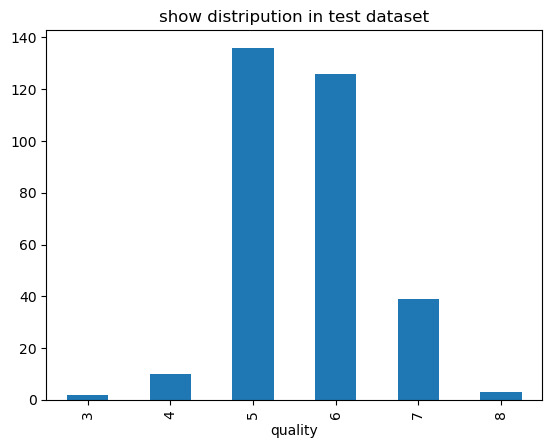

In [13]:
# varify distribution stayed same on test data
test.pivot_table(index='quality', aggfunc='size').plot(kind='bar', title='show distripution in test dataset')

In [14]:
# applying SMOTE

# gather all the features
X = []
cols = list(df_standardized)
for col in cols:
    if col != 'quality':
        X.append(col)

# SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train[X], train['quality'].ravel())
X_resampled.head(10)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.194290,-0.607714,-0.518673,-0.312950,-0.942531,-0.863146,0.221195,-0.127006,-0.275776,-1.178383
1,-0.077731,1.395498,-1.395079,0.025676,-0.275137,-0.620497,0.548681,0.399041,-1.159394,-0.777552
2,0.155388,0.560826,-0.518673,0.237317,0.487599,2.200291,0.657843,-1.442122,-0.805947,-1.078175
3,-0.310849,0.338247,0.306179,-0.291785,0.773625,2.230622,0.002871,-0.390029,-0.688131,-0.977968
4,0.330227,-0.830294,0.667053,-0.418770,-0.370479,-0.559835,-1.056000,-0.258517,0.548935,2.228677
5,-0.077731,-0.774649,1.131032,0.237317,2.966492,2.624926,0.603262,0.464797,1.962724,-0.577137
6,-1.593001,0.727760,-1.395079,-0.461098,-0.847189,-0.954139,-2.311363,1.385378,-0.452499,2.529300
7,-0.194290,-0.552070,0.460839,-0.270621,-0.561163,0.046786,0.439519,0.201774,-1.159394,-0.977968
8,-0.718807,0.866872,0.409286,0.004512,-0.656505,1.381353,-0.270034,-0.192761,-0.216868,-0.977968
9,-1.301603,-0.719004,-0.570227,-0.397606,-0.465821,-0.650828,-0.706682,0.727820,0.490027,-0.276514


<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='quality'>

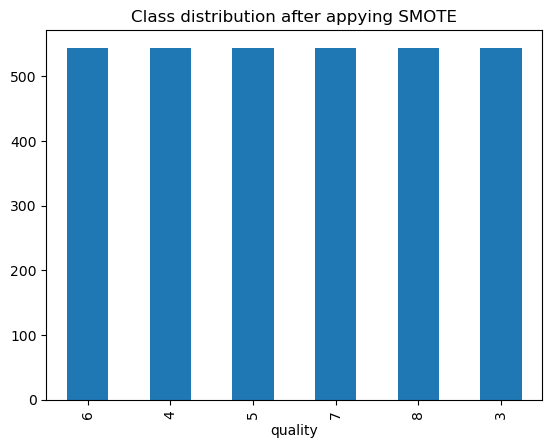

In [15]:
#show distribution after applying SMOTE
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='quality')



In [16]:
# train test with all features
X_train = X_resampled
y_train = y_resampled

X_test = test.drop('quality',axis = 1)
y_test = test['quality']


In [17]:
# train test with only strong corrlation features

df_selected = df_standardized[['volatile acidity','citric acid','sulphates','alcohol','quality']]


train_selected, test_selected = train_test_split(df_selected, test_size = 0.2, random_state = 42)
# SMOTE
X_resampled_selected, y_resampled_selected = SMOTE().fit_resample(df_selected[['volatile acidity','citric acid','sulphates','alcohol']], df_selected['quality'].ravel())

X_train_selected = X_resampled_selected
y_train_selected = y_resampled_selected

X_test_selected = test_selected.drop('quality',axis = 1)
y_test_selected = test_selected['quality']

## Model Building

In [18]:
# Build a Logistic Regression model using the training set.
reg = LogisticRegression()

# define search space
params = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1,0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 10, 100, 1000]
}

search = RandomizedSearchCV(estimator = reg, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
search.fit(X_train, y_train)

best_params = search.best_params_
reg_best = LogisticRegression(**best_params)
reg_best.fit(X_train,y_train)
log_preds = reg_best.predict(X_test)


# Accuracy score on testing set
accuracy = accuracy_score(y_test, log_preds)
print("Accuracy: %.3f%%" % (accuracy * 100.0))

# eval model

print('Report:\n',classification_report(y_test, log_preds))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the

Accuracy: 40.190%
Report:
               precision    recall  f1-score   support

           3       0.04      0.50      0.08         2
           4       0.05      0.30      0.09        10
           5       0.69      0.50      0.58       136
           6       0.56      0.30      0.39       126
           7       0.31      0.41      0.36        39
           8       0.05      0.33      0.09         3

    accuracy                           0.40       316
   macro avg       0.29      0.39      0.26       316
weighted avg       0.56      0.40      0.45       316



In [19]:
confusion_matrix(y_test, log_preds)

array([[ 1,  1,  0,  0,  0,  0],
       [ 3,  3,  1,  3,  0,  0],
       [10, 35, 68, 17,  3,  3],
       [ 8, 16, 27, 38, 30,  7],
       [ 1,  1,  2, 10, 16,  9],
       [ 0,  0,  0,  0,  2,  1]])

In [20]:
# use only strong corrlation features

# Build a Logistic Regression model using the training set.
reg_selected = LogisticRegression()

# define search space
params_selected = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1,0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 10, 100, 1000]
}

search_selected = RandomizedSearchCV(estimator = reg_selected, param_distributions = params_selected, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
search_selected.fit(X_train_selected, y_train_selected)

best_params_selected = search.best_params_
reg_best_selected = LogisticRegression(**best_params_selected)
reg_best_selected.fit(X_train_selected,y_train_selected)
log_preds_selected = reg_best_selected.predict(X_test_selected)


#2. Accuracy score on testing set
accuracy_selected = accuracy_score(y_test_selected, log_preds_selected)
print("Accuracy: %.3f%%" % (accuracy_selected * 100.0))

# eval model

print("F1 Score :",f1_score(log_preds_selected,y_test_selected,average = "weighted"))
print('Report:\n',classification_report(y_test_selected, log_preds_selected))


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the

Accuracy: 39.241%
F1 Score : 0.3389962594513811
Report:
               precision    recall  f1-score   support

           3       0.04      0.50      0.08         2
           4       0.09      0.43      0.14         7
           5       0.64      0.49      0.56       138
           6       0.62      0.30      0.40       123
           7       0.27      0.32      0.29        44
           8       0.02      0.50      0.05         2

    accuracy                           0.39       316
   macro avg       0.28      0.42      0.25       316
weighted avg       0.56      0.39      0.45       316



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the

In [21]:
confusion_matrix(y_test_selected, log_preds_selected)

array([[ 1,  0,  0,  1,  0,  0],
       [ 1,  3,  2,  0,  1,  0],
       [18, 21, 68, 19,  9,  3],
       [ 2, 10, 33, 37, 26, 15],
       [ 1,  1,  3,  3, 14, 22],
       [ 0,  0,  0,  0,  1,  1]])

**overservation :** on Logistic Regression model we can see that accuracy droed by 1 percent but the speed of the model increased significantly, however both model perfomrs quite bad.

In [22]:
# Instantiate the Naive bayes model with duafult setting
gnb = GaussianNB()



# define search space
params = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}

search = RandomizedSearchCV(estimator = gnb, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
search.fit(X_train, y_train)

best_params = search.best_params_
gnb_best = GaussianNB(**best_params)
gnb_best.fit(X_train,y_train)
naive_bayes_pred = gnb_best.predict(X_test)


#2. Accuracy score on testing set
accuracy = accuracy_score(y_test, naive_bayes_pred)
print("Accuracy: %.3f%%" % (accuracy * 100.0))

# eval model
print('Report:\n',classification_report(y_test, naive_bayes_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=0.6, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.6, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...............C=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.7, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.7, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.8, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=5, penalty=elasticnet, so

In [23]:
confusion_matrix(y_test, naive_bayes_pred)

array([[ 0,  2,  0,  0,  0,  0],
       [ 0,  3,  4,  2,  1,  0],
       [ 2, 51, 55, 13, 10,  5],
       [ 4, 28, 22, 28, 30, 14],
       [ 0,  4,  3, 11,  9, 12],
       [ 0,  0,  0,  1,  0,  2]])

In [24]:
# use only strong corrlation features

# Instantiate the Naive bayes model with duafult setting
gnb = GaussianNB()



# define search space
params = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}

search = RandomizedSearchCV(estimator = gnb, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
search.fit(X_train_selected, y_train_selected)

best_params = search.best_params_
gnb_best = GaussianNB(**best_params)
gnb_best.fit(X_train_selected,y_train_selected)
naive_bayes_pred = gnb_best.predict(X_test_selected)


#2. Accuracy score on testing set
accuracy = accuracy_score(y_test_selected, naive_bayes_pred)
print("Accuracy: %.3f%%" % (accuracy * 100.0))

# eval model

print('Report:\n',classification_report(y_test_selected, naive_bayes_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..............C=0.1, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ................C=0.6, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...............C=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.7, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=4, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=3, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=3, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=3, penalty=l2, so

**overservation :** Naive bayes runs quite fast on both model, using only stgrong corrlation features we are able to get better results.

In [25]:
# Instantiate the random forest model with duafult setting
rf = RandomForestRegressor(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 15, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# define search space
params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_grid = GridSearchCV(rf, params, refit = True, verbose = 3)
rf_random.fit(X_train, y_train)
#rf_grid.fit(X_train, y_train)
rf_pred = rf_random.predict(X_test).round()
#rf_pred = rf_grid.predict(X_test).round()


#2. Accuracy score on testing set
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy: %.3f%%" % (accuracy * 100.0))

# eval model

print('Report:\n',classification_report(y_test, rf_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ...............var_smoothing=0.00019828839491270713; total time=   0.0s
[CV] END ...............var_smoothing=0.00019828839491270713; total time=   0.0s
[CV] END ................var_smoothing=7.796360130405236e-07; total time=   0.0s
[CV] END ................var_smoothing=4.939621743878326e-08; total time=   0.0s
[CV] END ................var_smoothing=4.939621743878326e-08; total time=   0.0s
[CV] END ...............var_smoothing=1.1092898648952227e-08; total time=   0.0s
[CV] END ...............var_smoothing=1.1092898648952227e-08; total time=   0.0s
[CV] END ...............var_smoothing=1.3936192742241435e-07; total time=   0.0s
[CV] END ...............var_smoothing=1.3936192742241435e-07; total time=   0.0s
[CV] END ................var_smoothing=7.479522515621828e-09; total time=   0.0s
[CV] END ................var_smoothing=7.479522515621828e-09; total time=   0.0s
[CV] END ................var_smoothing=7.47952

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Instantiate the random forest model with duafult setting
rf = RandomForestRegressor(random_state = 42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 15, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# define search space
params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_random = RandomizedSearchCV(rf,params, n_iter=10, cv=5, random_state=42)
rf_random.fit(X_train_selected, y_train_selected)

rf_pred = rf_random.predict(X_test_selected).round()


#2. Accuracy score on testing set
accuracy = accuracy_score(y_test_selected, rf_pred)
print("Accuracy: %.3f%%" % (accuracy * 100.0))

# eval model

print('Report:\n',classification_report(y_test_selected, rf_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ...............var_smoothing=1.9828839491270713e-05; total time=   0.0s
[CV] END ...............var_smoothing=0.00011805165285688056; total time=   0.0s
[CV] END ..................var_smoothing=0.16114142772530193; total time=   0.0s
[CV] END ................var_smoothing=2.024446509976806e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.1325413151528126e-06; total time=   0.0s
[CV] END ................var_smoothing=7.796360130405236e-07; total time=   0.0s
[CV] END ...................var_smoothing=0.0595353313081437; total time=   0.0s
[CV] END ...................var_smoothing=0.0595353313081437; total time=   0.0s
[CV] END ...............var_smoothing=3.5444556739704354e-09; total time=   0.0s
[CV] END ................var_smoothing=7.959777002314977e-09; total time=   0.0s
[CV] END .................var_smoothing=0.012826498305280605; total time=   0.0s
[CV] END .................var_smoothing=0.0128

**observations :**

In [27]:
# Instantiate the SVC model with duafult setting
svc = SVC()



# define search space
params = {
    'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1, 2, 3, 4, 5,10],
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1, 2, 3, 4, 5,10],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
#svc_search = GridSearchCV(svc, params, refit = True, verbose = 3)
svc_search = RandomizedSearchCV(estimator = svc, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
svc_search.fit(X_train, y_train)

svc_pred = svc_search.predict(X_test)


#2. Accuracy score on testing set
accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy: %.3f%%" % (accuracy * 100.0))

# eval model

print('Report:\n',classification_report(y_test, svc_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=83; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=116; total time=   0.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=116; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators

In [28]:
# Instantiate the SVC model with duafult setting
svc = SVC()



# define search space
params = {
    'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1, 2, 3, 4, 5,10],
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1, 2, 3, 4, 5,10],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
#svc_search = GridSearchCV(svc, params, refit = True, verbose = 3)
svc_search = RandomizedSearchCV(estimator = svc, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
svc_search.fit(X_train_selected, y_train_selected)

svc_pred = svc_search.predict(X_test_selected)


#2. Accuracy score on testing set
accuracy = accuracy_score(y_test_selected, svc_pred)
print("Accuracy: %.3f%%" % (accuracy * 100.0))

# eval model


print('Report:\n',classification_report(y_test_selected, svc_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END .........................C=0.9, gamma=4, kernel=rbf; total time=   0.2s
[CV] END ........................C=4, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END .......................C=0.2, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.2, gamma=0.4, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.6, gamma=2, kernel=sigmoid; total time=   0.4s
[CV] END ...........................C=2, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.2, gamma=0.4, kernel=poly; total time=   0.2s
[CV] END ....................C=10, gamma=0.3, kernel=sigmoid; total time=   0.3s
[CV] END ......................C=0.6, gamma=0.4, kernel=poly; total time=   0.2s
[CV] END ......................C=0.6, gamma=0.4, kernel=poly; total time=   0.2s
[CV] END ........................C=0.7, gamma=3, kernel=poly; total time=  16.3s
[CV] END .........................C=10, gamma=

In [30]:
nn = MLPClassifier()

# define search space
params = {
    'hidden_layer_sizes': [(10,20,30,40,50),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}
nn_search = RandomizedSearchCV(estimator = nn, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
nn_search.fit(X_train, y_train)
predictions = nn_search.predict(X_test)
#2. Accuracy score on testing set
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.3f%%" % (accuracy * 100.0))

# eval model


print('Report:\n',classification_report(y_test, predictions))

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_percep

Accuracy: 54.747%
Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.10      0.07        10
           5       0.68      0.71      0.69       136
           6       0.55      0.45      0.50       126
           7       0.42      0.46      0.44        39
           8       0.20      0.33      0.25         3

    accuracy                           0.55       316
   macro avg       0.32      0.34      0.32       316
weighted avg       0.57      0.55      0.55       316



/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
nn = MLPClassifier()

# define search space
params = {
    'hidden_layer_sizes': [(10,20,30,40,50),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}
nn_search = RandomizedSearchCV(estimator = nn, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
nn_search.fit(X_train_selected, y_train_selected)
predictions = nn_search.predict(X_test_selected)
#2. Accuracy score on testing set
accuracy = accuracy_score(y_test_selected, predictions)
print("Accuracy: %.3f%%" % (accuracy * 100.0))

# eval model


print('Report:\n',classification_report(y_test_selected, predictions))

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

Accuracy: 59.494%
Report:
               precision    recall  f1-score   support

           3       0.22      1.00      0.36         2
           4       0.21      1.00      0.35         7
           5       0.69      0.61      0.65       138
           6       0.76      0.45      0.56       123
           7       0.52      0.86      0.65        44
           8       0.29      1.00      0.44         2

    accuracy                           0.59       316
   macro avg       0.45      0.82      0.50       316
weighted avg       0.68      0.59      0.61       316



/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 30, 40, 50), learning_rate=constant, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 20, 30, 40, 50), learning_rate=adaptive, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 20, 30, 40, 50), learning_rate=constant, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 30, 40, 50), learning_rate=constant, solver=sgd; total time=   2.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 20, 30, 40, 50), learning_rate=adap